<a href="https://colab.research.google.com/github/jeayoon/kaggle_jy/blob/master/mnist_jy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import models
from keras.models import Model
from keras import Input
from keras.layers import Activation, Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import TensorBoard, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
print(keras.__version__)

2.2.4


In [0]:
# 学習データとテストデータを取得する。
(_x_train_val, _y_train_val), (_x_test, _y_test) = mnist.load_data()

In [5]:
# 学習中の検証データがないので、train_test_split()を使って学習データ8割、検証データを2割に分割する。test_sizeが検証データの割合になっている。
_x_train, _x_val, _y_train, _y_val = train_test_split(_x_train_val, _y_train_val, test_size=0.2)

print("x_train   : ", _x_train.shape) # x_train   :  (48000, 28, 28)
print("y_train   : ", _y_train.shape) # y_train   :  (48000,)
print("x_val      : ", _x_val.shape) # x_val      :  (12000, 28, 28)
print("y_val      : ", _y_val.shape) # y_val      :  (12000,)
print("x_test    : ", _x_test.shape) # x_test    :  (10000, 28, 28)
print("y_test    : ", _y_test.shape) # y_test    :  (10000,)

x_train   :  (48000, 28, 28)
y_train   :  (48000,)
x_val      :  (12000, 28, 28)
y_val      :  (12000,)
x_test    :  (10000, 28, 28)
y_test    :  (10000,)


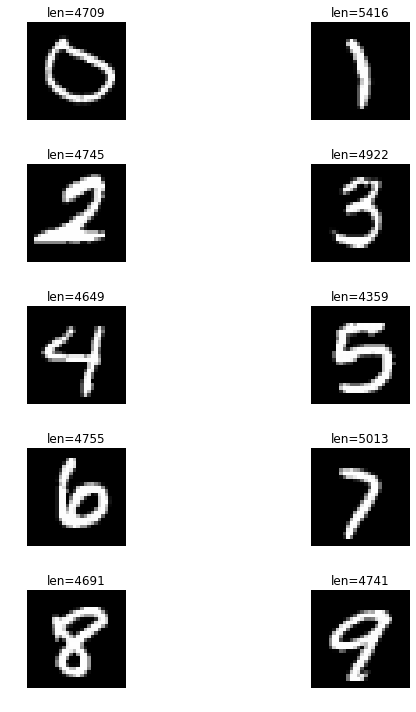

In [6]:
plt.figure(figsize=(10,10))

# MNISTの0から9の画像をそれぞれ表示する。
for i in range(10):
    data = [(x,t) for x, t in zip(_x_train, _y_train) if t == i]
    x, y = data[0]

    plt.subplot(5,2, i+1)
    # plt.title()はタイトルを表示する。ここでは画像枚数を表示している。
    plt.title("len={}".format(len(data)))
    # 画像を見やすいように座標軸を非表示にする。
    plt.axis("off")
    plt.imshow(x, cmap='gray')

plt.tight_layout()
plt.show()

In [0]:
# 学習、検証、テストデータの前処理用関数。
def preprocess(data, label=False):
    if label:
        # 教師データはto_categorical()でone-hot-encodingする。
        data = to_categorical(data)
    else:
        # 入力画像は、astype('float32')で型変換を行い、レンジを0-1にするために255で割る。
        # 0-255 -> 0-1
        data = data.astype('float32') / 255
        # Kerasの入力データの形式は(ミニバッチサイズ、横幅、縦幅、チャネル数)である必要があるので、reshape()を使って形式を変換する。
        # (sample, width, height) -> (sample, width, height, channel)
        data = data.reshape((-1, 28, 28, 1))

    return data

In [8]:
x_train = preprocess(_x_train)
x_val= preprocess(_x_val)
x_test = preprocess(_x_test)

y_train = preprocess(_y_train, label=True)
y_val = preprocess(_y_val, label=True)
y_test = preprocess(_y_test, label=True)

print(x_train.shape) # (48000, 28, 28, 1)
print(x_val.shape) # (12000, 28, 28, 1)
print(x_test.shape) # (10000, 28, 28, 1)
print(x_train.max()) # 1.0
print(x_val.max()) # 1.0
print(y_test.max()) # 1.0
print(y_train.shape) # (48000, 10)
print(y_val.shape) # (12000, 10) 
print(y_test.shape) # (10000, 10)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(10000, 28, 28, 1)
1.0
1.0
1.0
(48000, 10)
(12000, 10)
(10000, 10)


In [0]:
def model_sequential():
    activation = 'relu'

    model = models.Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', name='conv1', input_shape=(28, 28 , 1)))
    model.add(Activation(activation, name='act1'))
    model.add(MaxPooling2D((2, 2), name='pool1'))

    model.add(Conv2D(64, (3, 3), padding='same', name='conv2'))
    model.add(Activation(activation, name='act2'))
    model.add(MaxPooling2D((2, 2), name='pool2'))

    model.add(Conv2D(128, (3, 3), padding='same', name='conv3'))
    model.add(Activation(activation, name='act3'))

    model.add(Flatten(name='flatten'))
    model.add(Dense(64, name='dense4'))
    model.add(Activation(activation, name='act4'))
    model.add(Dense(10, name='dense5'))
    model.add(Activation('softmax', name='last_act'))

    return model

In [10]:
model = model_sequential()
model.summary()
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

W0821 11:18:42.561486 139872610768768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0821 11:18:42.578579 139872610768768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 11:18:42.581035 139872610768768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0821 11:18:42.597585 139872610768768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0821 11:18:42.664870 139872610768768 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 28, 28, 32)        320       
_________________________________________________________________
act1 (Activation)            (None, 28, 28, 32)        0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 14, 14, 64)        18496     
_________________________________________________________________
act2 (Activation)            (None, 14, 14, 64)        0         
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 7, 7, 128)         73856     
__________

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False)

In [12]:
batch_size=128
epochs=5
verbose=1
steps_per_epoch = x_train.shape[0] // batch_size

history = model.fit_generator(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=(x_val, y_val),
    verbose=verbose)

W0821 11:18:42.801869 139872610768768 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0821 11:18:42.902624 139872610768768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
375/375 [==============================] - 14s 36ms/step - loss: 0.4030 - acc: 0.8714 - val_loss: 0.0884 - val_acc: 0.9709
Epoch 2/5
375/375 [==============================] - 11s 28ms/step - loss: 0.1056 - acc: 0.9667 - val_loss: 0.0472 - val_acc: 0.9850
Epoch 3/5
375/375 [==============================] - 11s 28ms/step - loss: 0.0741 - acc: 0.9765 - val_loss: 0.0314 - val_acc: 0.9901
Epoch 4/5
375/375 [==============================] - 11s 28ms/step - loss: 0.0602 - acc: 0.9817 - val_loss: 0.0330 - val_acc: 0.9899
Epoch 5/5
375/375 [==============================] - 11s 29ms/step - loss: 0.0505 - acc: 0.9836 - val_loss: 0.0320 - val_acc: 0.9897


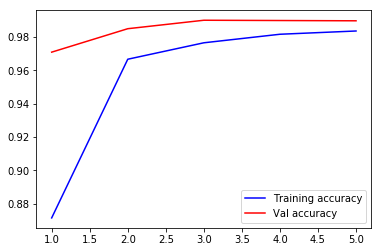

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Val accuracy')
plt.legend()
plt.show()

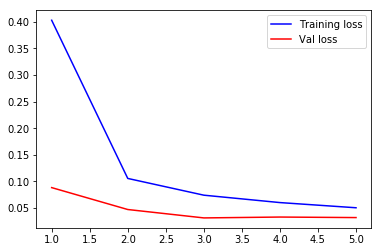

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1 )
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Val loss')
plt.legend()
plt.show()